In [55]:
import numpy as np
import pandas as pd 
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

In [50]:
datos = pd.read_csv("GrammarandProductReviews.csv")
train_set = datos['reviews.text']
reviews = datos['reviews.text']

In [4]:
datos.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [5]:
#Cantidad de lineas, cantidad de columnas
datos.shape

(71044, 25)

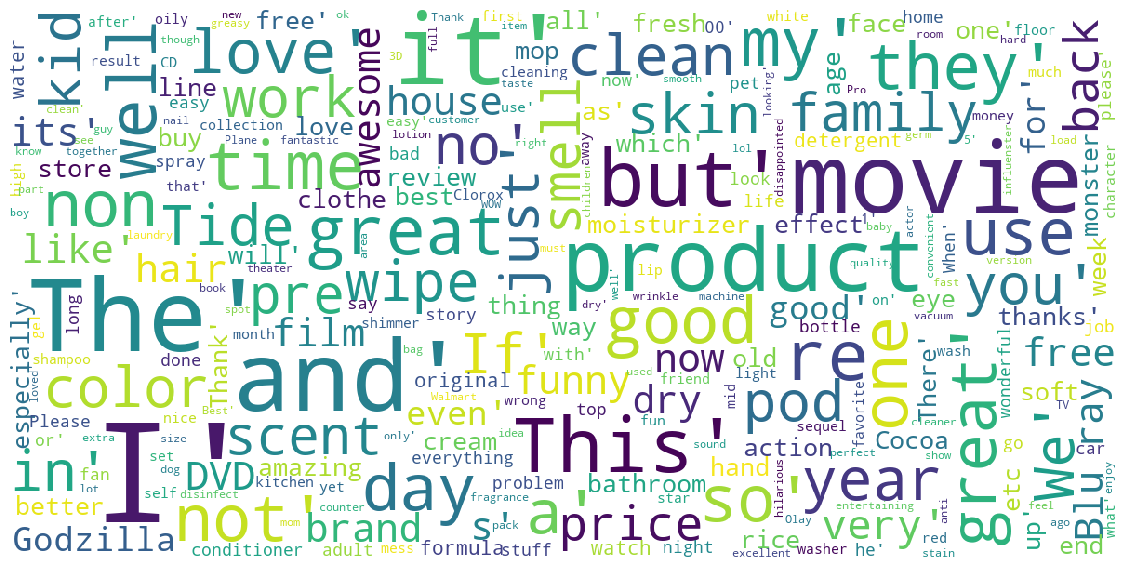

Counter({'i': 4958,
         'love': 12839,
         'this': 36680,
         'album.': 38,
         "it's": 3745,
         'very': 9955,
         'good.': 1069,
         'more': 5734,
         'to': 61021,
         'the': 103159,
         'hip': 7,
         'hop': 3,
         'side': 335,
         'than': 4346,
         'her': 1028,
         'current': 107,
         'pop': 270,
         'sound..': 2,
         'SO': 243,
         'HYPE!': 1,
         'listen': 100,
         'everyday': 539,
         'at': 7401,
         'gym!': 5,
         'give': 1222,
         'it': 46188,
         '5star': 2,
         'rating': 78,
         'all': 9908,
         'way.': 353,
         'metaphors': 1,
         'are': 12939,
         'just': 7385,
         'crazy.': 33,
         'Good': 1494,
         'flavor.': 98,
         'This': 28235,
         'review': 18434,
         'was': 39948,
         'collected': 17726,
         'as': 31759,
         'part': 18527,
         'of': 51920,
         'a': 75635,

In [74]:
frec = Counter()
for i in reviews:
    frec.update(w for w in str(i).split(' '))

wordcloud = WordCloud( background_color='white', max_words=300,max_font_size=50, scale=3,random_state=1).generate(str(frec))
fig = plt.figure(1, figsize=(20,20))
plt.axis('off')
fig.subplots_adjust(top=5)
plt.imshow(wordcloud)
plt.show()
    
frec

In [48]:
def calc_2gram(data):
    
    n_gram = []
    
    for tmp_data in data:
        tmp_data = str(tmp_data)
        last = ""
        for wn in tmp_data.split():
            if last == "":
                last = wn
                continue
                
            n_gram.append((last, wn))
            last = wn

    return n_gram

def calc_3gram(data):
    
    n_gram = []
    
    for tmp_data in data:
        tmp_data = str(tmp_data)
        last = ""
        p_last = ""
        for wn in tmp_data.split():
            if p_last == "":
                p_last = wn
                continue
            elif last == "":
                last = p_last
                p_last = wn
                continue
                
            n_gram.append((last, p_last, wn))
            last = p_last
            p_last = wn

    return n_gram


In [64]:
n2_gram = calc_2gram(reviews)
n2_gram

[('i', 'love'),
 ('love', 'this'),
 ('this', 'album.'),
 ('album.', "it's"),
 ("it's", 'very'),
 ('very', 'good.'),
 ('good.', 'more'),
 ('more', 'to'),
 ('to', 'the'),
 ('the', 'hip'),
 ('hip', 'hop'),
 ('hop', 'side'),
 ('side', 'than'),
 ('than', 'her'),
 ('her', 'current'),
 ('current', 'pop'),
 ('pop', 'sound..'),
 ('sound..', 'SO'),
 ('SO', 'HYPE!'),
 ('HYPE!', 'i'),
 ('i', 'listen'),
 ('listen', 'to'),
 ('to', 'this'),
 ('this', 'everyday'),
 ('everyday', 'at'),
 ('at', 'the'),
 ('the', 'gym!'),
 ('gym!', 'i'),
 ('i', 'give'),
 ('give', 'it'),
 ('it', '5star'),
 ('5star', 'rating'),
 ('rating', 'all'),
 ('all', 'the'),
 ('the', 'way.'),
 ('way.', 'her'),
 ('her', 'metaphors'),
 ('metaphors', 'are'),
 ('are', 'just'),
 ('just', 'crazy.'),
 ('Good', 'flavor.'),
 ('flavor.', 'This'),
 ('This', 'review'),
 ('review', 'was'),
 ('was', 'collected'),
 ('collected', 'as'),
 ('as', 'part'),
 ('part', 'of'),
 ('of', 'a'),
 ('a', 'promotion.'),
 ('Good', 'flavor.'),
 ('I', 'read'),
 ('read

In [68]:
cantidad2 = nltk.FreqDist(n2_gram)
cantidad2.most_common(20)

[(('of', 'a'), 18851),
 (('part', 'of'), 18127),
 (('as', 'part'), 17836),
 (('review', 'was'), 17731),
 (('was', 'collected'), 17724),
 (('collected', 'as'), 17724),
 (('This', 'review'), 17076),
 (('a', 'promotion.'), 17060),
 (('I', 'have'), 11047),
 (('of', 'the'), 8238),
 (('in', 'the'), 7651),
 (('I', 'love'), 7361),
 (('this', 'product'), 6802),
 (('and', 'I'), 6021),
 (('I', 'was'), 5301),
 (('is', 'a'), 5288),
 (('I', 'am'), 4698),
 (('and', 'the'), 4629),
 (('for', 'the'), 4415),
 (('my', 'hair'), 4278)]

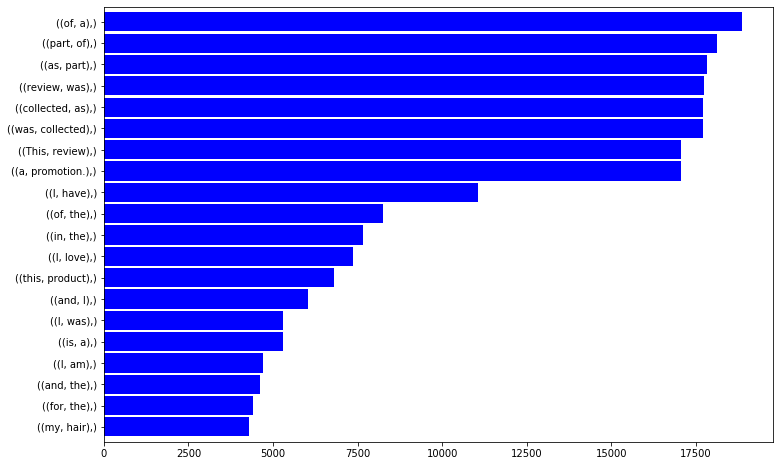

In [66]:
bigrama = (pd.Series(nltk.ngrams(n2_gram, 0)).value_counts())[:20]
bigrama.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))


In [67]:
n3_gram = calc_3gram(reviews)
n3_gram

[('i', 'love', 'this'),
 ('love', 'this', 'album.'),
 ('this', 'album.', "it's"),
 ('album.', "it's", 'very'),
 ("it's", 'very', 'good.'),
 ('very', 'good.', 'more'),
 ('good.', 'more', 'to'),
 ('more', 'to', 'the'),
 ('to', 'the', 'hip'),
 ('the', 'hip', 'hop'),
 ('hip', 'hop', 'side'),
 ('hop', 'side', 'than'),
 ('side', 'than', 'her'),
 ('than', 'her', 'current'),
 ('her', 'current', 'pop'),
 ('current', 'pop', 'sound..'),
 ('pop', 'sound..', 'SO'),
 ('sound..', 'SO', 'HYPE!'),
 ('SO', 'HYPE!', 'i'),
 ('HYPE!', 'i', 'listen'),
 ('i', 'listen', 'to'),
 ('listen', 'to', 'this'),
 ('to', 'this', 'everyday'),
 ('this', 'everyday', 'at'),
 ('everyday', 'at', 'the'),
 ('at', 'the', 'gym!'),
 ('the', 'gym!', 'i'),
 ('gym!', 'i', 'give'),
 ('i', 'give', 'it'),
 ('give', 'it', '5star'),
 ('it', '5star', 'rating'),
 ('5star', 'rating', 'all'),
 ('rating', 'all', 'the'),
 ('all', 'the', 'way.'),
 ('the', 'way.', 'her'),
 ('way.', 'her', 'metaphors'),
 ('her', 'metaphors', 'are'),
 ('metaphors'

In [69]:
cantidad3 = nltk.FreqDist(n3_gram)
cantidad3.most_common(20)

[(('as', 'part', 'of'), 17832),
 (('part', 'of', 'a'), 17777),
 (('review', 'was', 'collected'), 17724),
 (('was', 'collected', 'as'), 17724),
 (('collected', 'as', 'part'), 17724),
 (('This', 'review', 'was'), 17060),
 (('of', 'a', 'promotion.'), 17059),
 (('I', 'love', 'the'), 1987),
 (('I', 'have', 'been'), 1606),
 (('I', 'received', 'this'), 1449),
 (('This', 'is', 'a'), 1445),
 (('I', 'love', 'this'), 1235),
 (('have', 'been', 'using'), 1211),
 (('is', 'a', 'great'), 1206),
 (('this', 'product', 'for'), 1167),
 (('I', 'have', 'used'), 1081),
 (('a', 'lot', 'of'), 1070),
 (('received', 'this', 'product'), 1032),
 (('Olay', 'Total', 'Effects'), 943),
 (('easy', 'to', 'use'), 931)]

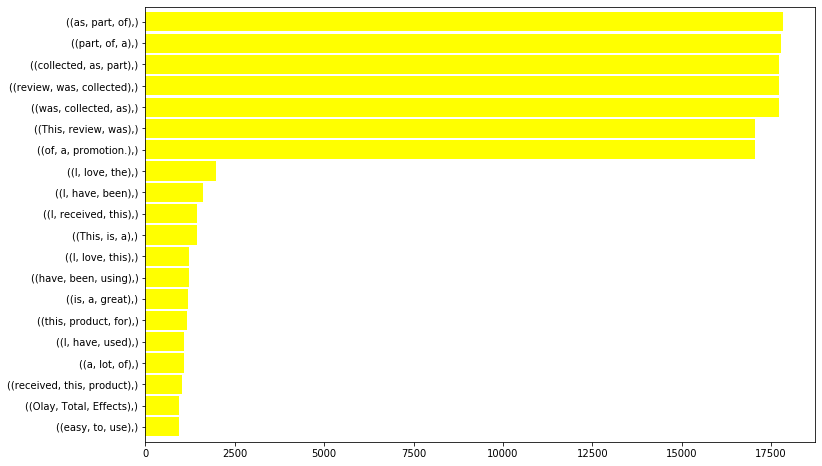

In [71]:
trigrama = (pd.Series(nltk.ngrams(n3_gram, 0)).value_counts())[:20]
trigrama.sort_values().plot.barh(color='yellow', width=.9, figsize=(12, 8))